# CNN to classify real-world applications
Course 2 - Week 3

This code based over the code provided during the:

**Tensorflow in Practice** - Coursera Specialization.

Original code repo: https://github.com/lmoroney/dlaicourse

To maximize the learning all the notebooks will be modified by keeping the underling goals. Finally, the ultimate goal is to learn best practices in the usage of TF an not to obtain for each notebook the best possible model.

### Download pretrained model

In [3]:
# Download data from the online storage
import urllib.request
url = ' https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
filename = 'inception_v3_weights.h5'
urllib.request.urlretrieve(url, filename)

('inception_v3_weights.h5', <http.client.HTTPMessage at 0x2827d13d358>)

### Imports

In [4]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model

# import pretrained model InceptionV3
from tensorflow.keras.applications.inception_v3 import InceptionV3

### Load Data path

In [6]:
BASE = "C:/git/TF_coursera/data/cats_and_dogs/"
train_dir = os.path.join(BASE, 'cats_and_dogs_filtered/train')
validation_dir = os.path.join(BASE, 'cats_and_dogs_filtered/validation')

### Load Inception model

In [8]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(filename)

# avoid the training of all the layers
for layer in pre_trained_model.layers:
    layer.trainable = False

In [10]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 74, 74, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 74, 74, 32)   0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [12]:
# select last layer of the pretrained model that we want to use
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [13]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 

In [14]:
# model compiler
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

### Image generator

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Model training

In [17]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=20,
                    validation_steps=50,
                    verbose=2)

Epoch 1/20
100/100 - 11s - loss: 1.4605 - accuracy: 0.8295 - val_loss: 0.3964 - val_accuracy: 0.8740
Epoch 2/20
100/100 - 10s - loss: 0.3460 - accuracy: 0.8850 - val_loss: 0.1582 - val_accuracy: 0.9520
Epoch 3/20
100/100 - 10s - loss: 0.3133 - accuracy: 0.9120 - val_loss: 0.1082 - val_accuracy: 0.9620
Epoch 4/20
100/100 - 10s - loss: 0.3036 - accuracy: 0.9140 - val_loss: 0.1422 - val_accuracy: 0.9610
Epoch 5/20
100/100 - 10s - loss: 0.2667 - accuracy: 0.9160 - val_loss: 0.1091 - val_accuracy: 0.9660
Epoch 6/20
100/100 - 10s - loss: 0.2243 - accuracy: 0.9300 - val_loss: 0.1202 - val_accuracy: 0.9680
Epoch 7/20
100/100 - 10s - loss: 0.2311 - accuracy: 0.9235 - val_loss: 0.1126 - val_accuracy: 0.9680
Epoch 8/20
100/100 - 10s - loss: 0.2410 - accuracy: 0.9255 - val_loss: 0.1293 - val_accuracy: 0.9620
Epoch 9/20
100/100 - 10s - loss: 0.1883 - accuracy: 0.9305 - val_loss: 0.1371 - val_accuracy: 0.9590
Epoch 10/20
100/100 - 10s - loss: 0.2137 - accuracy: 0.9320 - val_loss: 0.2710 - val_accura

### Evaluate model

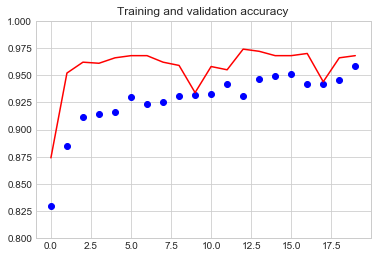

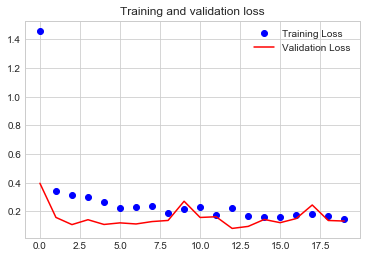

In [21]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.ylim((0.80,1))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

With transfer learning the model reaching high accuracy much faster. In this specific model we have trained only the final dense layers and including a dropout of 0.2 o reduce overfitting.
